### Calling libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### There are 2 pages of online-data

In [3]:
w_url = 'https://www.imdb.com/list/ls098063263/?sort=list_order,asc&st_dt=&mode=detail&page=1'
w_url2 = 'https://www.imdb.com/list/ls098063263/?sort=list_order,asc&st_dt=&mode=detail&page=2'

In [4]:
w_r = requests.get(w_url)
w_r2 = requests.get(w_url2)

In [5]:
w_r.status_code

200

In [6]:
pd.set_option('display.max_rows', 10)

### Get the html code from the website using BeautifulSoup

In [7]:
w_soup = BeautifulSoup(w_r.text)
w_soup2 = BeautifulSoup(w_r2.text)

### All the tables are in "lister-item-content" class

In [8]:
gross_divs = w_soup.find_all('div', {"class":"lister-item-content"})
gross_divs2 = w_soup2.find_all('div', {"class":"lister-item-content"})

In [9]:
rank = [int(h.find('span', {"class": "lister-item-index unbold text-primary"}).text.strip('.')) for h in gross_divs]
rank2 = [int(h.find('span', {"class": "lister-item-index unbold text-primary"}).text.strip('.')) for h in gross_divs2]

In [10]:
certificate = [(h.find('span', {"class": "certificate"})) for h in gross_divs]
certificate2 = [(h.find('span', {"class": "certificate"})) for h in gross_divs]

In [11]:
title = [h.find('a').get_text() for h in gross_divs]
title2 = [h.find('a').get_text() for h in gross_divs2]

In [12]:
year = [h.find('span', {"class": "lister-item-year text-muted unbold"}).get_text() for h in gross_divs]
year2 = [h.find('span', {"class": "lister-item-year text-muted unbold"}).get_text() for h in gross_divs2]

In [13]:
rating = [(h.find('span', {"class": "ipl-rating-star__rating"}).get_text()) for h in gross_divs]
rating2 = [(h.find('span', {"class": "ipl-rating-star__rating"}).get_text()) for h in gross_divs2]

In [14]:
runtime = [int(h.find('span', {"class": "runtime"}).text.strip(' min')) for h in gross_divs]
runtime2 = [int(h.find('span', {"class": "runtime"}).text.strip(' min')) for h in gross_divs2]

In [15]:
gross = [(h.find_all('span', {"name": "nv"}))[-1].get_text() for h in gross_divs]
gross2 = [(h.find_all('span', {"name": "nv"}))[-1].get_text() for h in gross_divs2]

### Putting two dataset together

In [16]:
df = pd.DataFrame({'Ranking':rank, 'Title':title, 'Year':year, 'Runtime':runtime, 'IMDb':rating, 'Box_Office(M)':gross, 'Rating':certificate})
df2 = pd.DataFrame({'Ranking':rank2, 'Title':title2, 'Year':year2, 'Runtime':runtime2, 'IMDb':rating2, 'Box_Office(M)':gross2, 'Rating':certificate2})

In [17]:
df = pd.concat([df, df2], ignore_index=True)
df

,Ranking,Title,Year,Runtime,IMDb,Box_Office(M),Rating
0,1,Avatar,(2009),162,7.8,$760.51M,[PG-13]
1,2,Avengers: Endgame,(2019),181,8.4,$858.37M,[PG-13]
2,3,Titanic,(1997),194,7.9,$659.33M,[PG-13]
3,4,Star Wars: Episode VII - The Force Awakens,(2015),138,7.8,$936.66M,[PG-13]
4,5,Avengers: Infinity War,(2018),149,8.4,$678.82M,[PG-13]
...,...,...,...,...,...,...,...
195,196,Ted,(2012),106,6.9,$218.82M,[PG-13]
196,197,American Sniper,(2014),133,7.3,$350.13M,[PG]
197,198,Mission: Impossible II,(2000),123,6.1,$215.41M,[PG-13]
198,199,Detective Chinatown 2,(2018),121,6.1,$1.98M,[PG]


### Clean the Year column, it has some unnecessary symbols

In [18]:
df['Year'] = df['Year'].str.extract(r'(\d\d\d\d)').astype(int)

### Extract the number from "Box Office" column. (Get rid of dollor sign and M)

In [19]:
df['Box_Office(M)'] = df['Box_Office(M)'].str.partition('$')[2].str.partition('M')[0]

In [20]:
df['IMDb'] = df['IMDb'].astype(float)

In [21]:
df.dtypes

Ranking            int64
Title             object
Year               int32
Runtime            int64
IMDb             float64
Box_Office(M)     object
Rating            object
dtype: object

### The Movie Box Office dataset is all clean and ready to do some cool analysis! :)

In [22]:
df

,Ranking,Title,Year,Runtime,IMDb,Box_Office(M),Rating
0,1,Avatar,2009,162,7.8,760.51,[PG-13]
1,2,Avengers: Endgame,2019,181,8.4,858.37,[PG-13]
2,3,Titanic,1997,194,7.9,659.33,[PG-13]
3,4,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,936.66,[PG-13]
4,5,Avengers: Infinity War,2018,149,8.4,678.82,[PG-13]
...,...,...,...,...,...,...,...
195,196,Ted,2012,106,6.9,218.82,[PG-13]
196,197,American Sniper,2014,133,7.3,350.13,[PG]
197,198,Mission: Impossible II,2000,123,6.1,215.41,[PG-13]
198,199,Detective Chinatown 2,2018,121,6.1,1.98,[PG]


In [23]:
df.isnull().sum()

Ranking          0
Title            0
Year             0
Runtime          0
IMDb             0
Box_Office(M)    0
Rating           4
dtype: int64

### Export the dataframe to csv file

In [24]:
df.to_csv('Movie IMDbs.csv', index=False)

### Explanatory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Movie IMDbs.csv')

In [27]:
df

,Ranking,Title,Year,Runtime,IMDb,Box_Office(M),Rating
0,1,Avatar,2009,162,7.8,760.51,"<span class=""certificate"">PG-13</span>"
1,2,Avengers: Endgame,2019,181,8.4,858.37,"<span class=""certificate"">PG-13</span>"
2,3,Titanic,1997,194,7.9,659.33,"<span class=""certificate"">PG-13</span>"
3,4,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,936.66,"<span class=""certificate"">PG-13</span>"
4,5,Avengers: Infinity War,2018,149,8.4,678.82,"<span class=""certificate"">PG-13</span>"
...,...,...,...,...,...,...,...
195,196,Ted,2012,106,6.9,218.82,"<span class=""certificate"">PG-13</span>"
196,197,American Sniper,2014,133,7.3,350.13,"<span class=""certificate"">PG</span>"
197,198,Mission: Impossible II,2000,123,6.1,215.41,"<span class=""certificate"">PG-13</span>"
198,199,Detective Chinatown 2,2018,121,6.1,1.98,"<span class=""certificate"">PG</span>"


In [28]:
df.dropna(subset=['Box_Office(M)','Rating'], inplace=True)

In [29]:
df['Rating'] = df['Rating'].str.partition('>')[2].str.partition('<')[0]

In [30]:
df = df.reset_index(drop=True)

In [31]:
df

,Ranking,Title,Year,Runtime,IMDb,Box_Office(M),Rating
0,1,Avatar,2009,162,7.8,760.51,PG-13
1,2,Avengers: Endgame,2019,181,8.4,858.37,PG-13
2,3,Titanic,1997,194,7.9,659.33,PG-13
3,4,Star Wars: Episode VII - The Force Awakens,2015,138,7.8,936.66,PG-13
4,5,Avengers: Infinity War,2018,149,8.4,678.82,PG-13
...,...,...,...,...,...,...,...
183,196,Ted,2012,106,6.9,218.82,PG-13
184,197,American Sniper,2014,133,7.3,350.13,PG
185,198,Mission: Impossible II,2000,123,6.1,215.41,PG-13
186,199,Detective Chinatown 2,2018,121,6.1,1.98,PG


In [32]:
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Regression Line')

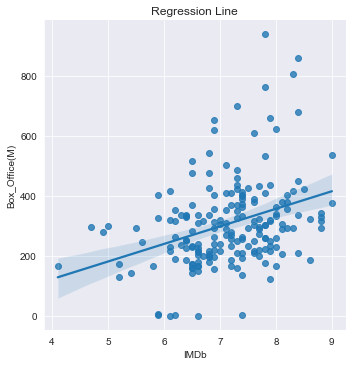

In [33]:
re = sns.lmplot(data=df, x='IMDb', y='Box_Office(M)')
plt.title('Regression Line')

Text(0.5, 1.0, 'IMDb trend: 1970 - 2022')

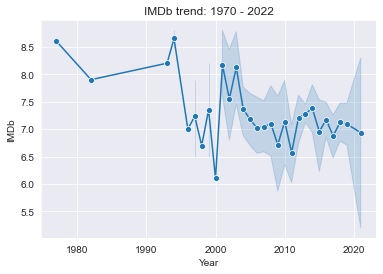

In [34]:
sns.lineplot(data=df, x='Year', y='IMDb', dashes=False, marker="o")
plt.title('IMDb trend: 1970 - 2022')

Text(0.5, 1.0, 'IMDbs by Rating')

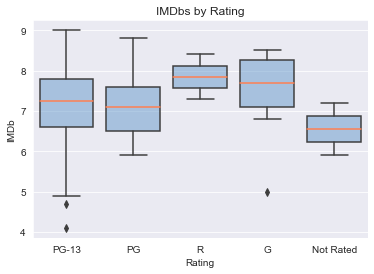

In [35]:
sns.boxplot(data=df, x='Rating', y='IMDb', boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
plt.title('IMDbs by Rating')

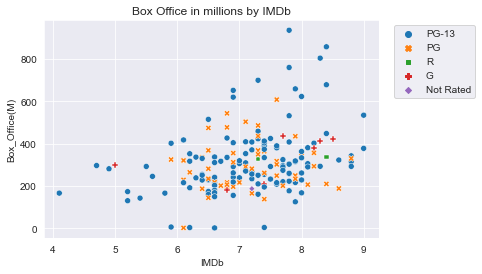

In [36]:
scatter = sns.scatterplot(data=df, x='IMDb', y='Box_Office(M)', hue='Rating', style='Rating')
plt.title('Box Office in millions by IMDb')
scatter.legend(bbox_to_anchor= (1.03, 1), title=False)

Text(0.5, 1.0, 'Box Office in millions by Rating')

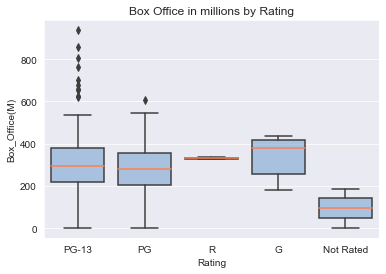

In [37]:
sns.boxplot(data=df, x='Rating', y='Box_Office(M)', boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
plt.title('Box Office in millions by Rating')

Text(0.5, 1.0, 'Year by Rating')

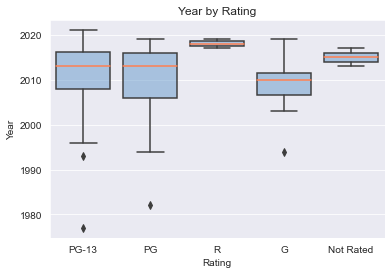

In [38]:
sns.boxplot(data=df, x='Rating', y='Year', boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
plt.title('Year by Rating')

Text(0.5, 1.0, 'Correlation Matrix')

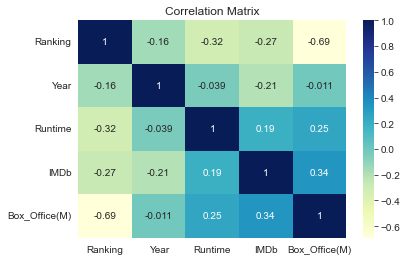

In [39]:
df1 = df.drop(labels=['Title', 'Rating'], axis=1)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Box Office in millions by IMDb')

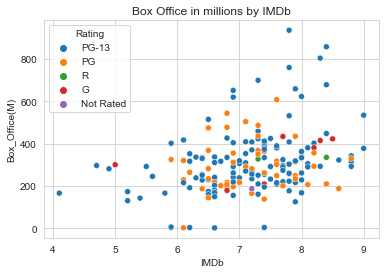

In [57]:
sns.set_style("whitegrid")
scatter = sns.scatterplot(data=df, x='IMDb', y='Box_Office(M)', hue='Rating')
plt.title('Box Office in millions by IMDb')